In [ ]:
!pip install --upgrade pip --quiet

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

!pip install matplotlib --quiet
!pip freeze --quiet > ../requirements.txt 

In [47]:
def load_data():
#     current_file = os.path.abspath(os.path.dirname(__file__))
    current_file = ""

    csv_filename = os.path.join(current_file, '../training_data/campaign_data.csv')
    campaign_data = pd.read_csv('../training_data/campaign_data.csv')

    csv_filename = os.path.join(current_file, '../training_data/coupon_item_mapping.csv')
    coupon_item_mapping_data = pd.read_csv(csv_filename)

    csv_filename = os.path.join(current_file, '../training_data/customer_demographics.csv')
    customer_demographics_data = pd.read_csv(csv_filename)

    csv_filename = os.path.join(current_file, '../training_data/customer_transaction_data.csv')
    customer_transaction_data = pd.read_csv(csv_filename)

    csv_filename = os.path.join(current_file, '../training_data/item_data.csv')
    item_data = pd.read_csv(csv_filename)

    csv_filename = os.path.join(current_file, '../training_data/train.csv')
    train_data = pd.read_csv(csv_filename)

    csv_filename = os.path.join(current_file, '../test_data/test_QyjYwdj.csv')
    test_data = pd.read_csv('../test_data/test_QyjYwdj.csv')
    
    return campaign_data, coupon_item_mapping_data, customer_demographics_data, \
           customer_transaction_data, item_data, train_data, test_data

In [57]:
campaign_data, coupon_item_mapping_data, customer_demographics_data, \
customer_transaction_data, item_data, train_data, test_data = load_data()


In [58]:
def univariate_analysis(df):
    print("\n Head: ")
    print(df.head())
    
    print("\n Number of NaN Entries: ")
    print(df.isna().sum())

    print("\n Number of Null Entries: ")
    print(df.isnull().sum())

    print("\n Statistical Description: ")
    print(df.describe(include='all'))
   
    for column in df.columns.values:
        print("\n\n Uniqueness analysis for column: ", column)
        unique_values = df[column].unique()
        print("\n\t\t Number of Unique values: ", len(unique_values))
        print("\n\t\t Unique values: ", unique_values)


In [59]:
# campaign_data data cleaning and imputation


print("\n -------------------------------------- campaign_data --------------------------------------- ")
campaign_data_columns =  campaign_data.columns.values
print("\n campaign_data_columns: ", campaign_data_columns)

univariate_analysis(campaign_data)

campaign_data['start_date'] = pd.to_datetime(campaign_data.start_date, format="%d/%m/%y")
campaign_data['end_date'] = pd.to_datetime(campaign_data.end_date, format="%d/%m/%y")

print(campaign_data.head())


 -------------------------------------- campaign_data --------------------------------------- 

 campaign_data_columns:  ['campaign_id' 'campaign_type' 'start_date' 'end_date']

 Head: 
   campaign_id campaign_type start_date  end_date
0           24             Y   21/10/13  20/12/13
1           25             Y   21/10/13  22/11/13
2           20             Y   07/09/13  16/11/13
3           23             Y   08/10/13  15/11/13
4           21             Y   16/09/13  18/10/13

 Number of NaN Entries: 
campaign_id      0
campaign_type    0
start_date       0
end_date         0
dtype: int64

 Number of Null Entries: 
campaign_id      0
campaign_type    0
start_date       0
end_date         0
dtype: int64

 Statistical Description: 
        campaign_id campaign_type start_date  end_date
count     28.000000            28         28        28
unique          NaN             2         25        26
top             NaN             Y   21/10/13  18/10/13
freq            NaN            22 

In [60]:
# coupon_item_mapping_data data cleaning and imputation

print("\n -------------------------------------- coupon_item_mapping_data --------------------------------------- ")
coupon_item_mapping_data_columns =  coupon_item_mapping_data.columns.values
print("\n coupon_item_mapping_data_columns: ", coupon_item_mapping_data_columns)

univariate_analysis(coupon_item_mapping_data)

print(coupon_item_mapping_data.head())


 -------------------------------------- coupon_item_mapping_data --------------------------------------- 

 coupon_item_mapping_data_columns:  ['coupon_id' 'item_id']

 Head: 
   coupon_id  item_id
0        105       37
1        107       75
2        494       76
3        522       77
4        518       77

 Number of NaN Entries: 
coupon_id    0
item_id      0
dtype: int64

 Number of Null Entries: 
coupon_id    0
item_id      0
dtype: int64

 Statistical Description: 
          coupon_id       item_id
count  92663.000000  92663.000000
mean     155.967387  36508.613071
std      282.991720  21131.312716
min        1.000000      1.000000
25%       22.000000  18255.500000
50%       30.000000  37955.000000
75%       42.000000  54191.500000
max     1116.000000  74061.000000


 Uniqueness analysis for column:  coupon_id

		 Number of Unique values:  1116

		 Unique values:  [105 107 494 ... 217 218 219]


 Uniqueness analysis for column:  item_id

		 Number of Unique values:  36289

		 Uni

In [72]:
# customer_transaction_data data cleaning and imputation

print("\n -------------------------------------- customer_transaction_data --------------------------------------- ")
customer_transaction_data_columns =  customer_transaction_data.columns.values
print("\n customer_transaction_data_columns: ", customer_transaction_data_columns)
univariate_analysis(customer_transaction_data)

customer_transaction_data['date'] = pd.to_datetime(customer_transaction_data.date, format="%Y/%m/%d")

print(customer_transaction_data.head())


 -------------------------------------- customer_transaction_data --------------------------------------- 

 customer_transaction_data_columns:  ['date' 'customer_id' 'item_id' 'quantity' 'selling_price'
 'other_discount' 'coupon_discount']

 Head: 
        date  customer_id  item_id  quantity  selling_price  other_discount  \
0 2012-01-02         1501    26830         1          35.26          -10.69   
1 2012-01-02         1501    54253         1          53.43          -13.89   
2 2012-01-02         1501    31962         1         106.50          -14.25   
3 2012-01-02         1501    33647         1          67.32            0.00   
4 2012-01-02         1501    48199         1          71.24          -28.14   

   coupon_discount  
0              0.0  
1              0.0  
2              0.0  
3              0.0  
4              0.0  

 Number of NaN Entries: 
date               0
customer_id        0
item_id            0
quantity           0
selling_price      0
other_discount   

In [73]:
# item_data data cleaning and imputation

print("\n -------------------------------------- item_data --------------------------------------- ")
item_data_columns =  item_data.columns.values
print("\n item_data_columns: ", item_data_columns)
univariate_analysis(item_data)


print(item_data.head())


 -------------------------------------- item_data --------------------------------------- 

 item_data_columns:  ['item_id' 'brand' 'brand_type' 'category']

 Head: 
   item_id  brand   brand_type       category
0        1      1  Established        Grocery
1        2      1  Established  Miscellaneous
2        3     56        Local         Bakery
3        4     56        Local        Grocery
4        5     56        Local        Grocery

 Number of NaN Entries: 
item_id       0
brand         0
brand_type    0
category      0
dtype: int64

 Number of Null Entries: 
item_id       0
brand         0
brand_type    0
category      0
dtype: int64

 Statistical Description: 
             item_id         brand   brand_type category
count   74066.000000  74066.000000        74066    74066
unique           NaN           NaN            2       19
top              NaN           NaN  Established  Grocery
freq             NaN           NaN        62842    32448
mean    37033.500000   1485.560055   

In [74]:
# customer_demographics_data data cleaning and imputation

print("\n -------------------------------------- customer_demographics_data --------------------------------------- ")
customer_demographics_data_columns =  customer_demographics_data.columns.values
print("\n customer_demographics_data_columns: ", customer_demographics_data_columns)
univariate_analysis(customer_demographics_data)


# print(customer_demographics_data.head())


 -------------------------------------- customer_demographics_data --------------------------------------- 

 customer_demographics_data_columns:  ['customer_id' 'age_range' 'marital_status' 'rented' 'family_size'
 'no_of_children' 'income_bracket']

 Head: 
   customer_id age_range marital_status  rented family_size no_of_children  \
0            1       70+        Married       0           2            NaN   
1            6     46-55        Married       0           2            NaN   
2            7     26-35            NaN       0           3              1   
3            8     26-35            NaN       0           4              2   
4           10     46-55         Single       0           1            NaN   

   income_bracket  
0               4  
1               5  
2               3  
3               6  
4               5  

 Number of NaN Entries: 
customer_id         0
age_range           0
marital_status    329
rented              0
family_size         0
no_of_children 

In [77]:
customer_demographics_data_copy = customer_demographics_data


In [82]:
customer_demographics_data_copy.loc[(customer_demographics_data_copy.family_size=='5+'), "family_size"] = '5'

customer_demographics_data.family_size = pd.to_numeric(customer_demographics_data.family_size)

customer_demographics_data_copy.loc[(customer_demographics_data_copy.no_of_children.isnull()) \
                                    & (customer_demographics_data_copy.family_size==1), "no_of_children"] = 0

customer_demographics_data_copy.loc[(customer_demographics_data_copy.marital_status.isnull()) \
                                    & (customer_demographics_data_copy.family_size==1), "marital_status"] = 'Single'

customer_demographics_data_copy.loc[(customer_demographics_data_copy.no_of_children.isnull()) \
                                    & (customer_demographics_data_copy.marital_status=='Married') \
                                    & (customer_demographics_data_copy.family_size==2), "no_of_children"] = 0

customer_demographics_data_copy.isna().sum()

customer_id         0
age_range           0
marital_status    146
rented              0
family_size         0
no_of_children    115
income_bracket      0
dtype: int64

Series([], Name: no_of_children, dtype: object)

In [83]:
customer_demographics_data_copy.loc[ (customer_demographics_data_copy.marital_status.isnull()) ]

,customer_id,age_range,marital_status,rented,family_size,no_of_children,income_bracket
2,7,26-35,NaN,0,3,1,3
3,8,26-35,NaN,0,4,2,6
14,28,46-55,NaN,0,2,NaN,1
18,35,18-25,NaN,0,2,NaN,4
30,55,46-55,NaN,0,2,NaN,5
...,...,...,...,...,...,...,...
744,1545,36-45,NaN,0,2,NaN,8
750,1566,26-35,NaN,0,2,NaN,9
755,1577,36-45,NaN,0,2,NaN,5
758,1580,26-35,NaN,0,2,NaN,5


In [85]:
customer_demographics_data_copy.loc[ customer_demographics_data_copy.no_of_children == '3+', "no_of_children" ] = 3


In [88]:
customer_demographics_data_copy.no_of_children = pd.to_numeric(customer_demographics_data.no_of_children)


In [89]:
customer_demographics_data_copy.no_of_children.unique()

array([ 0.,  1.,  2., nan,  3.])

In [90]:
customer_demographics_data_copy.loc[(customer_demographics_data_copy.marital_status.isnull()) \
                                    & (customer_demographics_data_copy.no_of_children > 0), "marital_status"] = 'Married'


In [91]:
customer_demographics_data_copy.isna().sum()

customer_id         0
age_range           0
marital_status     89
rented              0
family_size         0
no_of_children    115
income_bracket      0
dtype: int64

In [97]:
customer_demographics_data_copy2 = customer_demographics_data_copy

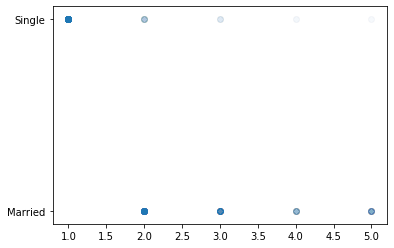

In [107]:
plt.scatter(customer_demographics_data_copy2.loc[~customer_demographics_data_copy2.marital_status.isna(), "family_size"],\
                                              customer_demographics_data_copy2.loc[~customer_demographics_data_copy2.marital_status.isna(), "marital_status"],
           alpha=0.01)
                                                                                   
                                                                                   
                                                                                   

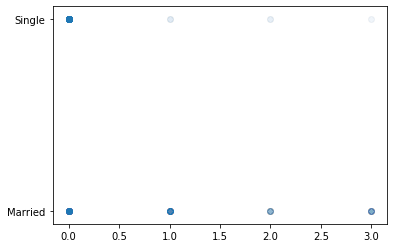

In [108]:
plt.scatter(customer_demographics_data_copy2.loc[~customer_demographics_data_copy2.marital_status.isna(), "no_of_children"],\
                                              customer_demographics_data_copy2.loc[~customer_demographics_data_copy2.marital_status.isna(), "marital_status"],
           alpha=0.01)
                                                                                   


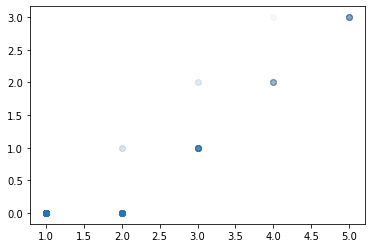

In [109]:
plt.scatter(customer_demographics_data_copy2.family_size, customer_demographics_data_copy2.no_of_children,
           alpha=0.01)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1165279e8>,
      dtype=object)

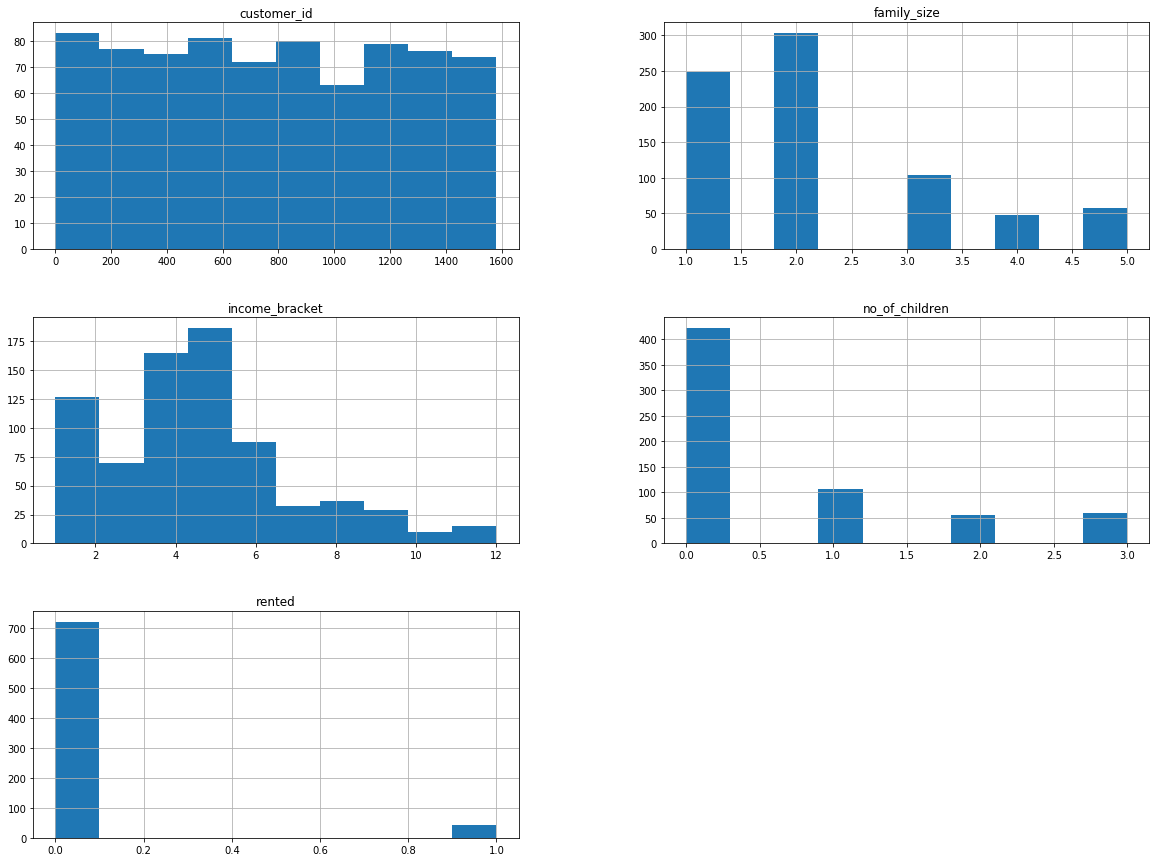

In [111]:
customer_demographics_data_copy.hist(figsize=(20,15))

In [118]:
customer_demographics_data_copy.isna().sum()

customer_id         0
age_range           0
marital_status     89
rented              0
family_size         0
no_of_children    115
income_bracket      0
dtype: int64

In [113]:
customer_demographics_data_copy.age_range.unique()

array(['70+', '46-55', '26-35', '36-45', '18-25', '56-70'], dtype=object)

In [114]:
customer_demographics_data.loc[customer_demographics_data.age_range=='18-25', "age_range"] = 21.5
customer_demographics_data.loc[customer_demographics_data.age_range=='26-35', "age_range"] = 30.5
customer_demographics_data.loc[customer_demographics_data.age_range=='36-45', "age_range"] = 40.5
customer_demographics_data.loc[customer_demographics_data.age_range=='46-55', "age_range"] = 50.5
customer_demographics_data.loc[customer_demographics_data.age_range=='56-70', "age_range"] = 63
customer_demographics_data.loc[customer_demographics_data.age_range=='70+', "age_range"] = 75
customer_demographics_data_copy.age_range.unique()

array([75, 50.5, 30.5, 40.5, 21.5, 63], dtype=object)

In [123]:
customer_demographics_data_copy2.age_range.unique()

array([75. , 50.5, 30.5, 40.5, 21.5, 63. ])

In [122]:
customer_demographics_data.age_range = pd.to_numeric(customer_demographics_data.age_range)

customer_demographics_data_copy = customer_demographics_data.copy()

In [120]:
customer_demographics_data_copy.head()

,customer_id,age_range,marital_status,rented,family_size,no_of_children,income_bracket
0,1,75,Married,0,2,0.0,4
1,6,50.5,Married,0,2,0.0,5
2,7,30.5,Married,0,3,1.0,3
3,8,30.5,Married,0,4,2.0,6
4,10,50.5,Single,0,1,0.0,5


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11aa64630>,
      dtype=object)

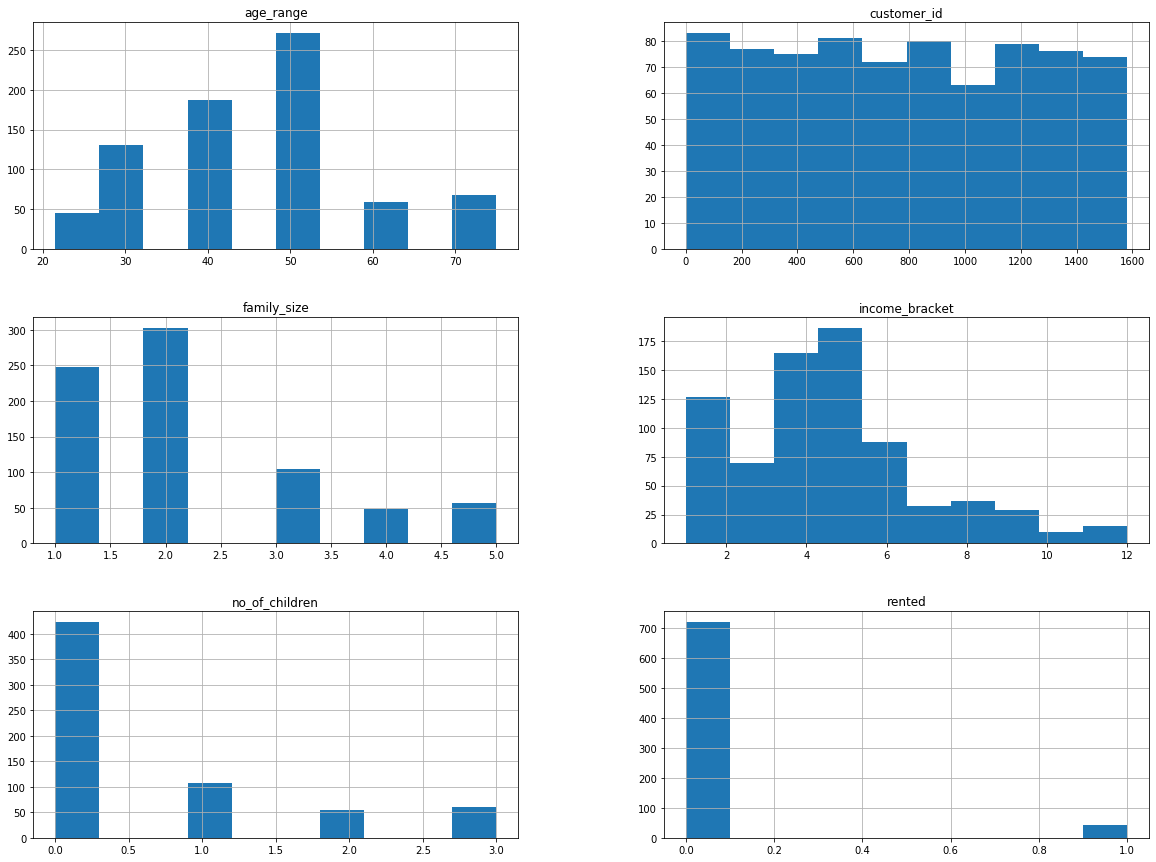

In [125]:
customer_demographics_data.hist(figsize=(20,15))

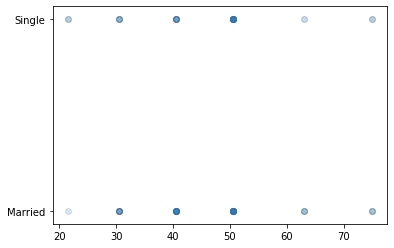

In [129]:
cond = ~customer_demographics_data.marital_status.isna()
plt.scatter(customer_demographics_data.loc[cond, "age_range"], customer_demographics_data.loc[cond, "marital_status"], alpha=0.01)

[ 0. nan  3.  2.  1.]
23
(297,)
[0. 1. 2. 3.]
0
(374,)


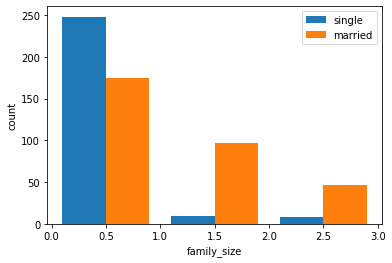

In [202]:
cond = (~customer_demographics_data.marital_status.isna())
cond_single = (customer_demographics_data.marital_status == 'Single')
cond_married = (customer_demographics_data.marital_status == 'Married')
single = customer_demographics_data.loc[cond & cond_single, "no_of_children" ]
married = customer_demographics_data.loc[cond & cond_married, "no_of_children" ]

print(single.unique())
print(sum(single>0))
print(single.shape)
print(married.unique())
print(sum(married.isna()))
print(married.shape)


plt.hist([single, married], np.sort(customer_demographics_data.loc[cond, "no_of_children"].unique()))
plt.legend(["single", "married"])

plt.xlabel("family_size")
plt.ylabel("count")
plt.show()

In [133]:
customer_demographics_data.loc[cond, "age_range"]

0      75.0
1      50.5
2      30.5
3      30.5
4      50.5
       ... 
753    50.5
754    40.5
756    50.5
757    50.5
759    30.5
Name: age_range, Length: 671, dtype: float64

In [146]:
print(customer_demographics_data.loc[cond, "family_size"].unique().sort())

None


In [150]:
np.sort(customer_demographics_data.loc[cond, "family_size"].unique())

array([1, 2, 3, 4, 5])

In [160]:
customer_demographics_data.isna().sum()

customer_id         0
age_range           0
marital_status     89
rented              0
family_size         0
no_of_children    115
income_bracket      0
dtype: int64

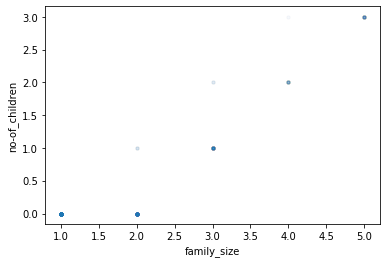

In [167]:
plt.scatter(customer_demographics_data.family_size, customer_demographics_data.no_of_children, alpha=0.01, s=10)
plt.xlabel("family_size")
plt.ylabel("no-of_children")
plt.show()

In [ ]:
customer_demographics_data = 

In [ ]:
plt.scatter